
# Project: Medical Appointment No Shows Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

###  - Bonus [3 Points] : Work with another regression dataset on Kaggle that you find interesting and repeat all the steps in Task 2.

<a id='intro'></a>
## Introduction

>  In Brazil, patients make a doctor appointment before going to the clinic. However, the clinics have complained that about 30% of the patients miss their scheduled medical appointment. Therefore, they have collected a dataset containing information about all patients. They just want to know what are the factors that affect whether the patient will show on his/her medical appointment or not.


In [16]:
 # First I import the packages that I will  use to facilitate the process of analysis the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import preprocessing

from collections import Counter
from sklearn.metrics import mean_squared_error

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# to Load dataset 
ds=pd.read_csv("Dataset.csv")
# to print the first few lines
ds.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Now we know some information about our data. there are a patient id , appointment id , gender of the patient, scheduled day, appointment day, age, neighbourhood, scolarship, hiportension, diabetes, alcoholism, handcap, sms_received and no-show colums.
From this we can notice that there are some typos error in the columns names**
<ul>
<li>patient id , appointment id are just unique ids for each patient
<li>gender give us whether the patient (M) male or (F) female
<li>scheduled day is the day in which the patient call the clinic and take an appointment
<li>appointment day is the day in which the patient should go to the medical appointment
<li>age is the age of that patient
<li>neighbourhood is Where the appointment takes place
<li>scolarship whether the patient take a support or not
<li>hiportension, diabetes, alcoholism, handcap whether the patient has suffer from them or not
<li>sms_received a message sent to the patient 
<li>no-show yes mean that the patient did not show the medical appointment no mean he/she attend the appointment
</ul>

In [3]:
#the niumber of colums and rows in the dataset
ds.shape

(110527, 14)

In [4]:
#To see if there are dublicated data or not
sum(ds.duplicated())

0

**From that we know that there are no any duplicated data**

In [5]:
# To obtain a summary descriptive statstics about the dataset
ds.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**From the output we can see that the min age is -1 which is not a valid value.**

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**From the above information, there is not any null value. The SheduledDsay and AppointmentDay are DateTime not object.**

### Data Cleaning

**As we can figure after assessing the dataset. we find that:**
<ul>
<li> the age has a  non-valid value </li>
<li>there are some typos error in the columns names</li>
<li>The SheduledDsay and AppointmentDay are DateTime  not object.</li>
</ul>
I will clean those error

In [7]:
#Here clean the data errors
#First we rename the columns that have a wrong names
ds = ds.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_Show' })
# deleting the non valid values of the age that have a value less than 0
ds=ds[ds.Age > 0]
# Convert the type of the AppointmentDay 
ds['AppointmentDay']=pd.to_datetime(ds["AppointmentDay"])
ds['ScheduledDay']=pd.to_datetime(ds["ScheduledDay"])
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106987 non-null  float64            
 1   AppointmentID   106987 non-null  int64              
 2   Gender          106987 non-null  object             
 3   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 5   Age             106987 non-null  int64              
 6   Neighbourhood   106987 non-null  object             
 7   Scholarship     106987 non-null  int64              
 8   Hypertension    106987 non-null  int64              
 9   Diabetes        106987 non-null  int64              
 10  Alcoholism      106987 non-null  int64              
 11  Handicap        106987 non-null  int64              
 12  SMS_received    106987 non-null  int64              
 13  No_Show       

I think the patient and the appointment ID, scheduledDay and Neighbourhood will not give us information so I will  drop them

In [8]:
ds.drop(["PatientId","AppointmentID","ScheduledDay",'Neighbourhood'], axis=1, inplace=True)
ds.head()

,Gender,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,F,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,M,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No
2,F,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No
3,F,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No
4,F,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          106987 non-null  object             
 1   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 2   Age             106987 non-null  int64              
 3   Scholarship     106987 non-null  int64              
 4   Hypertension    106987 non-null  int64              
 5   Diabetes        106987 non-null  int64              
 6   Alcoholism      106987 non-null  int64              
 7   Handicap        106987 non-null  int64              
 8   SMS_received    106987 non-null  int64              
 9   No_Show         106987 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(7), object(2)
memory usage: 9.0+ MB


In [10]:
ds.head()

,Gender,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,F,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,M,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No
2,F,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No
3,F,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No
4,F,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No


**Now we have 10 variable. the only dependent variable is No_Show and the other are all independent variables**

<a id='eda'></a>
## Exploratory Data Analysis

**Below we see that about 80 % of the patients have shown up for the medical appointment and 20 % have not shown up.**

In [11]:
ds["No_Show"].value_counts()

No     85307
Yes    21680
Name: No_Show, dtype: int64

In [12]:
#This will give us the rows in which the patient show the mediacl appointment
Show=ds.No_Show=='No'
#This will give us the rows in which the patient no show the mediacl appointment
No_Show=ds.No_Show=='Yes'

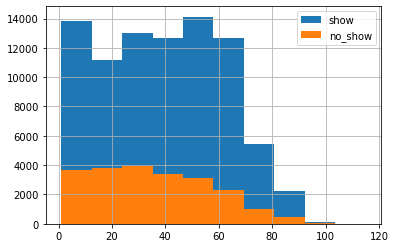

In [13]:
#to see whether the Age affect showing up for the medical appointment or not 
ds.Age[Show].hist(alpha=1,label='show');
ds.Age[No_Show].hist(alpha=1, label='no_show');
plt.legend()

**From above there is no any indication that can tell us the age affect the show up or not, therefore, I think Rhe age is not a factor by which we can indicate whether a patient will show up or not**

In [15]:
#count the num of males and females
a=ds.Gender.value_counts()
#count the num of males and females who show up for the medial appointment
b=ds.Gender[Show].value_counts()
#count the num of males and females who did not  show up for the medial appointment
c=ds.Gender[No_Show].value_counts()
# the percentage of the female who show up 
f=(b[0]/a[0])*100
# the percentage of the female who did not show up 
f1=(c[0]/a[0])*100
# the percentage of the male who show up
m=(b[1]/a[1])*100
# the percentage of the male who did not show up

m1=(c[1]/a[1])*100
print("The percentage of the female who show up is {:0.2f} % and the percentage who did not show up is {:0.2f}% " .format(f,f1))
print("the percentage of the male who show up is {:0.2f} % and the percentage who did not show up is {:0.2f} %".format(m,m1))

The percentage of the female who show up is 79.64 % and the percentage who did not show up is 20.36% 
the percentage of the male who show up is 79.92 % and the percentage who did not show up is 20.08 %


**Also from above, we can't consider the gender as a factor affecting whether the patient will show up or not Because both female and male have the same percentage od showing up**

In [ ]:
#to see whether the Scholarship affect showing up for the medical appointment or not 
ds.Scholarship[Show].hist(alpha=1,label='show');
ds.Scholarship[No_Show].hist(alpha=1, label='no_show');
plt.legend()

**From the above histogram, we can say that the scholarship may affect but its effect is not huge. below I will try to calculate the exact percentage of the patient with scholarship and show up**

In [ ]:
#this is the num of the patient with and withput scholarship
wo=ds.Scholarship.value_counts()
#this is the num of the patient with and withput scholarship and show up 
s=(ds.Scholarship[Show]).value_counts()
#this is the num of the patient with and withput scholarship and did not show up 
n=(ds.Scholarship[No_Show]).value_counts()
sw=(s[1]/wo[1])*100
so=(s[0]/wo[0])*100
print("The percentage of patients with scolarship and show up is {:.2f} %".format(sw))
print("The percentage of patients WithOUt scolarship and show up is {:.2f} %".format(so))

**Therefore we can see that the patient without scholarship show up for the medical appointment more than those with scholarship**

In [ ]:
#to see whether the Hypertension affect showing up for the medical appointment or not 
ds.Hypertension[Show].hist(alpha=1,label='show');
ds.Hypertension[No_Show].hist(alpha=1, label='no_show');
plt.legend()

#this is the num of the patient with and withput Hypertension
wo=ds.Hypertension.value_counts()
#this is the num of the patient with and withput Hypertension and show up 
s=(ds.Hypertension[Show]).value_counts()
#this is the num of the patient with and withput Hypertension and did not show up 
n=(ds.Hypertension[No_Show]).value_counts()
sw=(s[1]/wo[1])*100
so=(s[0]/wo[0])*100
print("The percentage of patients with Hypertension and show up is {:.2f} %".format(sw))
print("The percentage of patients WithOUt Hypertension and show up is {:.2f} %".format(so))

**Therefore we can see that the patient with Hypertension  show up for the medical appointment more than those WithOUt Hypertension**

In [ ]:
#to see whether the Diabetes affect showing up for the medical appointment or not 
ds.Diabetes[Show].hist(alpha=1,label='show');
ds.Diabetes[No_Show].hist(alpha=1, label='no_show');
plt.legend()

#this is the num of the patient with and withput Diabetes
wo=ds.Diabetes.value_counts()
#this is the num of the patient with and withput Diabetes and show up 
s=(ds.Diabetes[Show]).value_counts()
#this is the num of the patient with and withput Diabetes and did not show up 
n=(ds.Diabetes[No_Show]).value_counts()
sw=(s[1]/wo[1])*100
so=(s[0]/wo[0])*100
print("The percentage of patients with Diabetes and show up is {:.2f} %".format(sw))
print("The percentage of patients WithOUt Diabetes and show up is {:.2f} %".format(so))

**Therefore we can see that the patient with Diabetes show up for the medical appointment more than those WithOUt Diabetes**

In [ ]:
#to see whether the Alcoholism affect showing up for the medical appointment or not 
ds.Alcoholism[Show].hist(alpha=1,label='show');
ds.Alcoholism[No_Show].hist(alpha=1, label='no_show');
plt.legend()

#this is the num of the patient with and withput Alcoholism
wo=ds.Alcoholism.value_counts()
#this is the num of the patient with and withput Alcoholism and show up 
s=(ds.Alcoholism[Show]).value_counts()
#this is the num of the patient with and withput Alcoholism and did not show up 
n=(ds.Alcoholism[No_Show]).value_counts()
sw=(s[1]/wo[1])*100
so=(s[0]/wo[0])*100
print("The percentage of patients with Alcoholism and show up is {:.2f} %".format(sw))
print("The percentage of patients WithOUt Alcoholism and show up is {:.2f} %".format(so))

**From above it's obvious that the factor of Alcoholism is not affecting whether the patient will show up or not**

In [ ]:
#to see whether the Handicap affect showing up for the medical appointment or not 
ds.Handicap[Show].hist(alpha=1,label='show');
ds.Handicap[No_Show].hist(alpha=1, label='no_show');
plt.legend()

#this is the num of the patient with and withput Handicap
wo=ds.Handicap.value_counts()
#this is the num of the patient with and withput Handicap and show up 
s=(ds.Handicap[Show]).value_counts()
#this is the num of the patient with and withput Handicap and did not show up 
n=(ds.Handicap[No_Show]).value_counts()
sw=(s[1]/wo[1])*100
so=(s[0]/wo[0])*100
print("The percentage of patients with Handicap and show up is {:.2f} %".format(sw))
print("The percentage of patients WithOUt Handicap and show up is {:.2f} %".format(so))

**Therefore we can see that the patient with Handicap show up for the medical appointment more than those WithOUt Handicap**

In [ ]:
#to see whether the SMS_received affect showing up for the medical appointment or not 
ds.SMS_received[Show].hist(alpha=1,label='show');
ds.SMS_received[No_Show].hist(alpha=1, label='no_show');
plt.legend()

#this is the num of the patient with and withput SMS_received
wo=ds.SMS_received.value_counts()
#this is the num of the patient with and withput SMS_received and show up 
s=(ds.SMS_received[Show]).value_counts()
#this is the num of the patient with and withput SMS_received and did not show up 
n=(ds.SMS_received[No_Show]).value_counts()
sw=(s[1]/wo[1])*100
so=(s[0]/wo[0])*100
print("The percentage of patients with SMS_received and show up is {:.2f} %".format(sw))
print("The percentage of patients WithOUt SMS_received and show up is {:.2f} %".format(so))

**Therefore we can see that the patient WithOUt SMS_received shows up for the medical appointment more than those with SMS_received. It seems so wired as it was expected the opposite**

<a id='conclusions'></a>
## Conclusions





We can conclude that 
<ul> 
    <li> the factors that affect the show up are Scholarship, SMS_received, Handicap, Diabetes, Hypertension
    <li>the factors that do not affect the show up are Gender, Age, Alcoholism
</ul>
we also can say that the patient without scholarship and suffer from Handicap, Diabetes and Hypertension may have a higher prediction of show up for the medical appointment

I think it is better to perform Knn as it's more classification than being regression

In [ ]:
copy=df.copy()
copy['Gender'] = copy['Gender'].astype('category')
copy['region'] = copy['region'].astype('category')
copy['No_Show'] = copy['No_Show'].astype('No_Show')

copy['Gender'] = copy['Gender'].cat.codes
copy['region'] = copy['region'].cat.codes
copy['No_Show'] = copy['No_Show'].cat.codes


In [ ]:
ds.head()

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])